<a href="https://colab.research.google.com/github/Adhithyan-1004/CODSOFT/blob/main/Spam_SMS_Detection_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



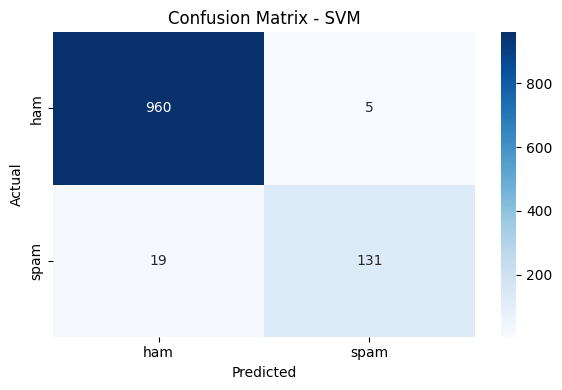

In [2]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')  # Adjust the file path if needed
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

#Encode labels (ham = 0, spam = 1)
label_encoder = LabelEncoder()
df['label_num'] = label_encoder.fit_transform(df['label'])

#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

#Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

#Evaluate
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()


Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



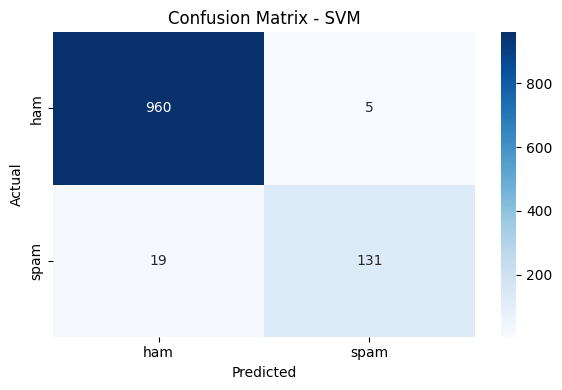

Enter a message to check: You won ₹10,000 cash! Call now.
Prediction: SPAM (Spam)


In [5]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path if needed)
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Clean and prepare the data
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels (ham = 0, spam = 1)
label_encoder = LabelEncoder()
df['label_num'] = label_encoder.fit_transform(df['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

# Vectorize messages using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

# Predict on single user input
user_msg = input("Enter a message to check: ")

# Transform and predict
user_tfidf = tfidf.transform([user_msg])
prediction = svm_model.predict(user_tfidf)
label = label_encoder.inverse_transform(prediction)[0]

print(f"Prediction: {label.upper()} ({'Not Spam' if label == 'ham' else 'Spam'})")
